# Classification of Wood Species based on Images

The Forest Species Database – Microscopic contains 2,240 microscopic images of `112` different wood
species. The images have been captured through microscope optics and the spatial resolution of the
images is 1024 x 768 pixels. The total size of the data set is approx. 3.5 GB.

## 0. Title
Lappeenranta-Lahti University of Technology LUT

BM20A6100 Advanced Data Analysis and Machine Learning - Luento-opetus 6.9.2021-17.12.2021

 
Practical Assignment

Group D: 
Mikhail Farmakovskii, stnum: `000327770`, developer; 
Daniil Kunin, stnum: `000331753`, developer.

19.12.2021


## 1. Problem
Train a convolutional neural network (CNN), classify the images to the predetermined classes (wood species) and quantitatively evaluate the model performance

## 2. Data
https://web.inf.ufpr.br/vri/databases/forest-species-database-microscopic/

## 3. Evaluation
Quantitatively evaluate the model performance

## 4. Features

* There are 112 wood species, 20 images per species = 2,240 images. (112 classes)


## Adjust workspace

In [1]:
# Import TensorFlow into jupyter
import tensorflow as tf
# Import Pandas into jupyter
import pandas as pd
# Same for numpy
import numpy as np 

## Data processing

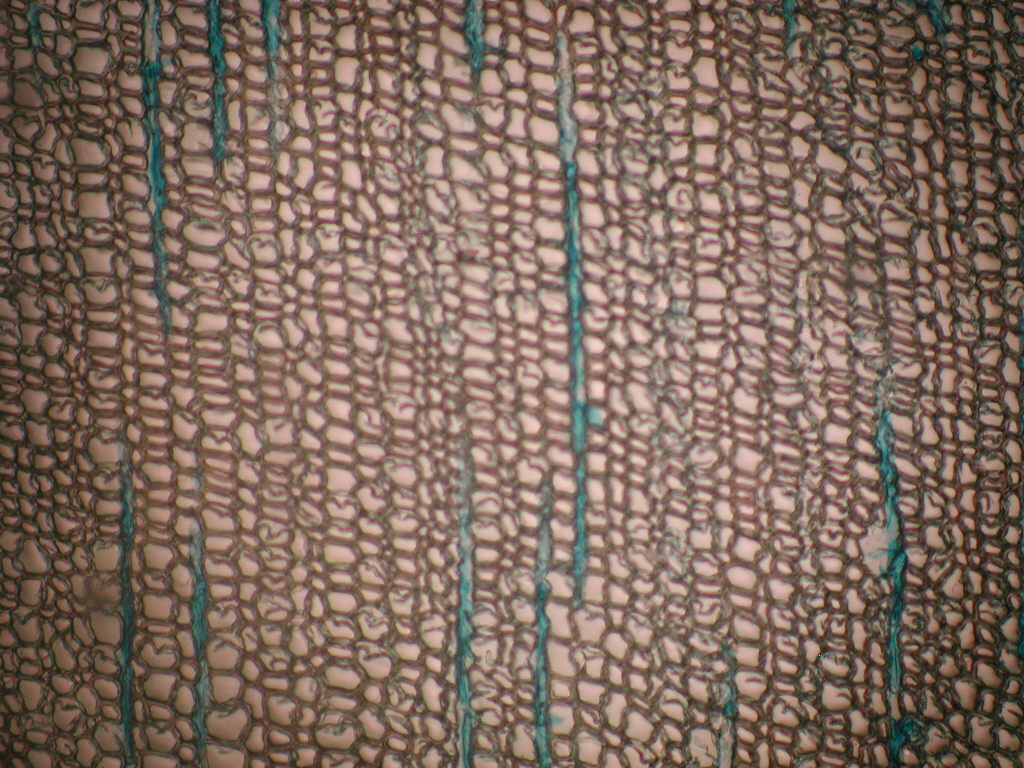

In [2]:
# Let's view an image
from IPython.display import Image
Image("C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00101.png")

### Load images and their labels

In [247]:
def get_filenames(folder):
    """
    The function appends file paths to list
    """
    dirs = os.listdir(folder) # list of folders with species
    filenames = [] # create an empty list
    labels = [] # list for 
    for i in range(0, len(dirs)):
        cur_dir = str(folder + "/" + dirs[i] + "/")
        #print(cur_dir)
        list_of_files = os.listdir(cur_dir) # list of files in current folder
        for j in range(0, len(list_of_files)):
            species = "'" + dirs[i]  + "'" # get true classes
            #print(species)
            QQ = eval(species)
            labels.append(QQ)
        
            files = "'" + cur_dir + str(list_of_files[j]) + "'"
            q = eval(files) 
            filenames.append(q) # append image paths to list 
            
    return filenames, labels

In [248]:
filenames, labels = get_filenames("C:/Users/misha/Desktop/sample_project_1/data")
filenames[:5]

['C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00101.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00102.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00103.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00104.png',
 'C:/Users/misha/Desktop/sample_project_1/data/001 Ginkgo biloba/00105.png']

In [249]:
labels

['001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '001 Ginkgo biloba',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '002 Agathis becarii',
 '003 Araucaria angustifolia',
 '003 Araucaria angustifolia',
 '003 Araucaria an

In [251]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches the number of filenames")
else:
    print("Number of labels does not matches the number of filenames")

Number of labels matches the number of filenames


In [253]:
labels = np.array(labels)
labels[:5]

array(['001 Ginkgo biloba', '001 Ginkgo biloba', '001 Ginkgo biloba',
       '001 Ginkgo biloba', '001 Ginkgo biloba'], dtype='<U31')